# Sobol Space Filling to generate Force Field Parameters

use a sobol sequence to generate a random space filling design for force field parameters that are used to create training data for ML algorithms

In [1]:
## import libraries
from scipy.stats import qmc
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
## set parameter limits
SigC_lim = [0.0500, 0.3500]
SigH_lim = [0.0455, 0.3185]
EpsC_lim = [0.1643, 1.1501]
EpsH_lim = [0.0200, 0.1400]

In [3]:
## set a seed for reproducibility
sd = 29

## set dimension d
dim = 4 # SigmaC, SigmaH, EpsilonC, EpsilonH

## set number of samples
# NOTE: must be in the form of 2^x samples
# x = 1 -> 2 samples
# x = 2 -> 4 samples
# x = 3 -> 8 samples ..
x = 11 # 2^11 = 2048 samples
x = 3
sampler = qmc.Sobol(d=dim, seed=sd)

In [4]:
sampler.reset()
sample = sampler.random_base2(m=x)
#print(f'{sample}')
df_sample = pd.DataFrame(data=sample, columns=['SigC', 'SigH','EpsC','EpsH'])
#print(f'{df_sample}')

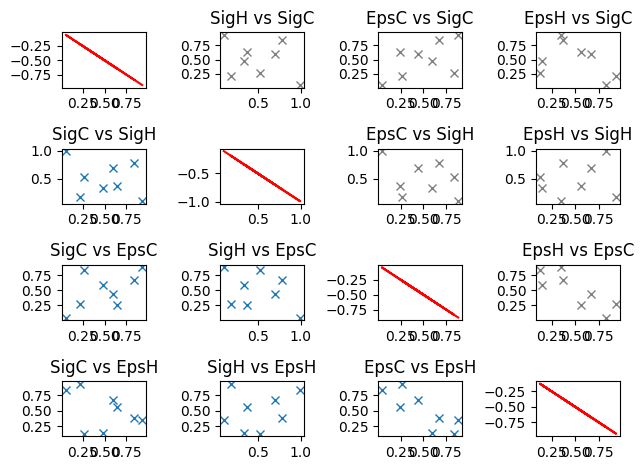

In [5]:
## plot
SigC = df_sample.loc[:,'SigC'].to_numpy()
#print(f'{SigC}')
SigH = df_sample.loc[:,'SigH'].to_numpy()
EpsC = df_sample.loc[:,'EpsC'].to_numpy()
EpsH = df_sample.loc[:,'EpsH'].to_numpy()

fig, axs = plt.subplots(4, 4)
axs[0, 0].plot(SigC, -SigC, '-', color='#FF0000')
axs[1, 0].set_title('SigC vs SigH')
axs[1, 0].plot(SigC, SigH, 'x')
axs[2, 0].set_title('SigC vs EpsC')
axs[2, 0].plot(SigC, EpsC, 'x')
axs[3, 0].set_title('SigC vs EpsH')
axs[3, 0].plot(SigC, EpsH, 'x')

axs[0, 1].set_title('SigH vs SigC')
axs[0, 1].plot(SigH, SigC, 'x', color='#808080')
axs[1, 1].plot(SigH, -SigH, '-', color='#FF0000')
axs[2, 1].set_title('SigH vs EpsC')
axs[2, 1].plot(SigH, EpsC, 'x')
axs[3, 1].set_title('SigH vs EpsH')
axs[3, 1].plot(SigH, EpsH, 'x')

axs[0, 2].set_title('EpsC vs SigC')
axs[0, 2].plot(EpsC, SigC, 'x', color='#808080')
axs[1, 2].set_title('EpsC vs SigH')
axs[1, 2].plot(EpsC, SigH, 'x', color='#808080')
axs[2, 2].plot(EpsC, -EpsC, '-', color='#FF0000')
axs[3, 2].set_title('EpsC vs EpsH')
axs[3, 2].plot(EpsC, EpsH, 'x')

axs[0, 3].set_title('EpsH vs SigC')
axs[0, 3].plot(EpsH, SigC, 'x', color='#808080')
axs[1, 3].set_title('EpsH vs SigH')
axs[1, 3].plot(EpsH, SigH, 'x', color='#808080')
axs[2, 3].set_title('EpsH vs EpsC')
axs[2, 3].plot(EpsH, EpsC, 'x', color='#808080')
axs[3, 3].plot(EpsH, -EpsH, '-', color='#FF0000')

fig.tight_layout()

In [21]:
## shift from range [0, 1) to [min_param, max_param)
##                  [a, b) to [c, d)
## using: f(t) = c + ((d-c)/(b-a))*(t-a)
def shift_range(a,b,c,d,values):
  shifted = c + ((d-c)/(b-a))*(values-a)
  return shifted

shifted_SigC = shift_range(0, 1, SigC_lim[0], SigC_lim[1], SigC)
#print(f'SigC [0, 1): {SigC}')
#print(f'shifted SigC [{SigC_lim[0]}, {SigC_lim[1]}): {shifted_SigC}')
shifted_SigH = shift_range(0, 1, SigH_lim[0], SigH_lim[1], SigH)
shifted_EpsC = shift_range(0, 1, EpsC_lim[0], EpsC_lim[1], EpsC)
shifted_EpsH = shift_range(0, 1, EpsH_lim[0], EpsH_lim[1], EpsH)

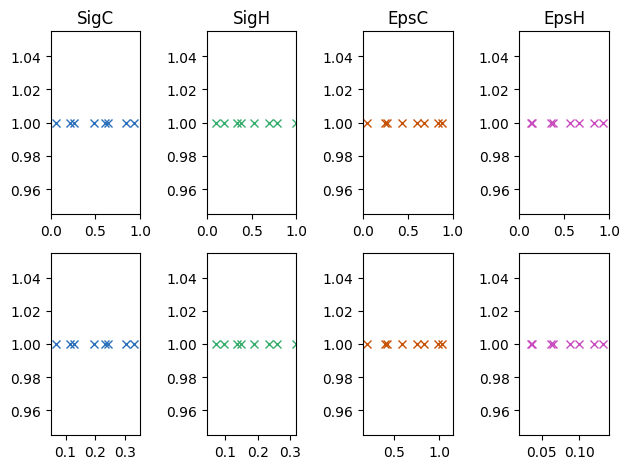

In [27]:
## check range shift visually
ones = np.ones(len(shifted_SigC))
#print(f'ones {ones}')
fig, axs = plt.subplots(2, 4)
axs[0, 0].set_title('SigC')
axs[0, 0].plot(SigC, ones, 'x', color='#2c6fbb')
axs[0, 0].set_xlim(0, 1)
axs[1, 0].plot(shifted_SigC, ones, 'x', color='#2c6fbb')
axs[1, 0].set_xlim(SigC_lim[0], SigC_lim[1])

axs[0, 1].set_title('SigH')
axs[0, 1].plot(SigH, ones, 'x', color='#35ad6b')
axs[0, 1].set_xlim(0, 1)
axs[1, 1].plot(shifted_SigH, ones, 'x', color='#35ad6b')
axs[1, 1].set_xlim(SigH_lim[0], SigH_lim[1])

axs[0, 2].set_title('EpsC')
axs[0, 2].plot(EpsC, ones, 'x', color='#c65102')
axs[0, 2].set_xlim(0, 1)
axs[1, 2].plot(shifted_EpsC, ones, 'x', color='#c65102')
axs[1, 2].set_xlim(EpsC_lim[0], EpsC_lim[1])

axs[0, 3].set_title('EpsH')
axs[0, 3].plot(EpsH, ones, 'x', color='#c94cbe')
axs[0, 3].set_xlim(0, 1)
axs[1, 3].plot(shifted_EpsH, ones, 'x', color='#c94cbe')
axs[1, 3].set_xlim(EpsH_lim[0], EpsH_lim[1])

fig.tight_layout()

In [38]:
## creade pandas DF for shifted parameters
#type(shifted_SigC)
#print(f'{shifted_SigC}')
shifted_params = np.array([shifted_SigC, shifted_SigH])
print(f'{shifted_params}')
print(f'{shifted_params}')
#df_shifted_parameters = pd.DataFrame([shifted_SigC, shifted_SigH, shifted_EpsC, shifted_EpsH], columns=['SigC', 'SigH', 'EpsC', 'EpsH'])
#print(f'shifted parameters: {df_shifted_parameters}')

[[0.32951089 0.07423114]
 [0.06675362 0.31626165]
 [0.19394754 0.1367998 ]
 [0.23058844 0.23589855]
 [0.2421656  0.14889113]
 [0.12875711 0.19041638]
 [0.11523563 0.0962857 ]
 [0.3024156  0.25934793]]
